# **Load libraries and data**

In [90]:
!pip install --upgrade pythainlp
!pip install pyLDAvis

In [91]:
import pandas as pd
import pythainlp
import gensim
import pyLDAvis.gensim
pyLDAvis.enable_notebook()
import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)

In [92]:
df = pd.read_csv('Customer Review.csv')

In [93]:
df.tail()

,Comment,Rating,Date
25,อาหารเกาหลีร้าน Doorae อร่อยทุกอย่างเลย ชอบทั้...,4,2022-10-20
26,อยากกินอาหารเกาหลี ต้องไปโคเรียนทาวน์ ที่นี่รั...,3,2023-03-27
27,ร้านอยู่ korean town ครับ ที่จอดรถต้องเข้าซอยส...,4,2023-04-24
28,DooRae Korean Restaurant (สุขุมวิทพลาซ่า) ร้าน...,4,2023-06-22
29,วันนี้อยากทานอาหารที่โคเรียนทาวน์ ร้านนี้จึงเป...,2,2022-07-25


# **Tokenize Words**

In [94]:
stopwords = list(pythainlp.corpus.thai_stopwords())
removed_words = [' ', ',', ' ,', '\n', 'ร้าน', '(', ')', 'เกาหลี','โค','เรียน','ทาวน์', 'Restaurant', 'Korean','korean','town','Doorae','doorae','DooRae', 'อาหาร','กิน','ทาน']
screening_words = stopwords + removed_words

def tokenize_with_space(sentence):
    merged = ''
    words = pythainlp.word_tokenize(str(sentence), engine='newmm')
    for word in words:
        if word not in screening_words:
            merged = merged + ',' + word
    return merged[1:]

In [95]:
df['Comment_tokenized'] = df['Comment'].apply(lambda x: tokenize_with_space(x))

In [96]:
df.tail()

,Comment,Rating,Date,Comment_tokenized
25,อาหารเกาหลีร้าน Doorae อร่อยทุกอย่างเลย ชอบทั้...,4,2022-10-20,"อร่อย,ชอบ,ปิ้ง,ย่าง,สัน,หมู,หมัก,ซอส,เนื้อ,ซี่..."
26,อยากกินอาหารเกาหลี ต้องไปโคเรียนทาวน์ ที่นี่รั...,3,2023-03-27,"ที่นี่,รับประกัน,แท้ๆ,ดู,เร,เป็นที่นิยม,อันดับ..."
27,ร้านอยู่ korean town ครับ ที่จอดรถต้องเข้าซอยส...,4,2023-04-24,"ที่จอดรถ,ซอย,สุขุมวิท,12,ลาน,จอด,ใต้ดิน,ขวามือ..."
28,DooRae Korean Restaurant (สุขุมวิทพลาซ่า) ร้าน...,4,2023-06-22,"สุขุมวิท,พลาซ่า,ร้านอาหาร,ที่อยู่,ลิสต์,ตั้งใจ..."
29,วันนี้อยากทานอาหารที่โคเรียนทาวน์ ร้านนี้จึงเป...,2,2022-07-25,"ทานอาหาร,ตั้งใจ,โอเค,2,ปีก่อน,เลือก,เนื้อวัว,เ..."


# **Create Dictionary**

In [97]:
import gensim

documents = df['Comment_tokenized'].to_list()
texts = [[text for text in doc.split(',')] for doc in documents]
dictionary = gensim.corpora.Dictionary(texts)

In [98]:
print(dictionary.token2id.keys())

dict_keys(['ขายดี', 'ข้าว', 'ชอบ', 'ชั้น', 'ซอล', 'ซอส', 'ตอน', 'ถาม', 'ที่นั่ง', 'บิ', 'ปิ้ง', 'พนักงาน', 'มับ', 'ย่าง', 'รองรับ', 'รู้จัก', 'สดชื่น', 'สามชั้น', 'สไตล์', 'หมัก', 'หมี่', 'หมู', 'หลากหลาย', 'อร่อย', 'ฮิต', 'เกรียม', 'เครื่องเคียง', 'เด้ง', 'เย็น', 'เลือก', 'เส้น', 'Town', 'ความชอบ', 'ชื่อ', 'ดังที่', 'ตั้งอยู่', 'ต้นตำรับ', 'บริเวณ', 'ยังมี', 'ลิ้มลอง', 'สั่ง', 'สุขุมวิท', 'เข้ามา', 'เป็นหนึ่ง', 'เมนู', 'แล้วก็', 'กรอบ', 'ขวัญใจ', 'คิมบับ', 'คุณภาพ', 'จิ', 'ฉับ', 'ซี่โครง', 'ซุป', 'ถูกใจ', 'ธรรมชาติ', 'นัล', 'นัว', 'บริการ', 'บอ', 'ผักสด', 'พิซซ่า', 'ฟี', 'ยอง', 'รส', 'ราคา', 'ร้านอาหาร', 'ล', 'ลาย', 'สะอาด', 'หอมกรุ่น', 'หอย', 'อริ', 'ออกปาก', 'อั้น', 'อู', 'อ่อน', 'ฮอต', 'เซ', 'เด็ด', 'เตา', 'เติม', 'เต้าหู้', 'เบิ้ล', 'เลป', 'แจ่ม', 'แช', 'แน่น', 'แบ', 'แฟน', 'แสง', 'ไฮไลท์', '-', '..', 'กก', 'กลมกล่อม', 'กะ', 'กี่', 'งึบงั้บ', 'จอน', 'จุก', 'ซี', 'ดึ้ง', 'ตลับ', 'ท', 'ทำ', 'ที่มา', 'นุ่ม', 'ป', 'ปัง', 'ฟู้ด', 'รายการ', 'รี', 'ร้อน', 'ว่าที่', 'หอม', 'เกลือ', 'เข้าเ

In [99]:
gensim_corpus = [dictionary.doc2bow(text, allow_update=True) for text in texts]
word_frequencis = [[(dictionary[id],frequence) for id, frequence in couple] for couple in gensim_corpus]

# **Topic Modeling**

In [100]:
from gensim import corpora

dictionary = corpora.Dictionary(texts)
dictionary.filter_extremes(no_below=5, no_above=0.5, keep_n=2000)
corpus = [dictionary.doc2bow(text) for text in texts]

In [101]:
from gensim import models

n_topics = 7

lda_model = models.LdaModel(corpus=corpus, num_topics=n_topics)

In [102]:
import pyLDAvis
import pyLDAvis.gensim_models

pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(lda_model, corpus, dictionary)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
6     -0.012228 -0.022451       1        1  30.866766
2     -0.052921  0.077891       2        1  21.199689
1      0.030997 -0.066858       3        1  16.567240
0      0.037390  0.071281       4        1  12.491041
3     -0.131389 -0.054039       5        1   9.385274
4      0.121321 -0.033240       6        1   8.446761
5      0.006831  0.027416       7        1   1.043229, topic_info=       Term       Freq      Total Category  logprob  loglift
23       คน  16.000000  16.000000  Default  30.0000  30.0000
0      ชั้น  16.000000  16.000000  Default  29.0000  29.0000
8      เมนู  15.000000  15.000000  Default  28.0000  28.0000
33      คิว   8.000000   8.000000  Default  27.0000  27.0000
29    กิมจิ   8.000000   8.000000  Default  26.0000  26.0000
..      ...        ...        ...      ...      ...      ...
14     ราคา   0.048906  12.143692   Topic7  -4.3766  -0.9518
11  ซี่โครง   0.048831  10.680541   Topic7  -4.3781  -0.8250
20        -   0.048822  14.368990   Topic7  -4.3783  -1.1218
27    แนะนำ   0.048820   8.405812   Topic7  -4.3783  -0.5857
22      จาน   0.048795  10.639892   Topic7  -4.3789  -0.8219

[267 rows x 6 columns], token_table=      Topic      Freq  Term
term                       
20        1  0.208783     -
20        2  0.347972     -
20        3  0.139189     -
20        5  0.069594     -
20        6  0.208783     -
...     ...       ...   ...
34        6  0.494223  โต๊ะ
37        1  0.531739   ใส่
37        2  0.132935   ใส่
37        5  0.132935   ใส่
37        6  0.132935   ใส่

[163 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[7, 3, 2, 1, 4, 5, 6])

# **Wordcloud**

In [103]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
from wordcloud import WordCloud

In [104]:
path = '/content/THSarabunNew.ttf'

In [105]:
long_string = ','.join(list(df['Comment_tokenized'].values))
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue', width=2400, height=1000)
wordcloud.generate(long_string)

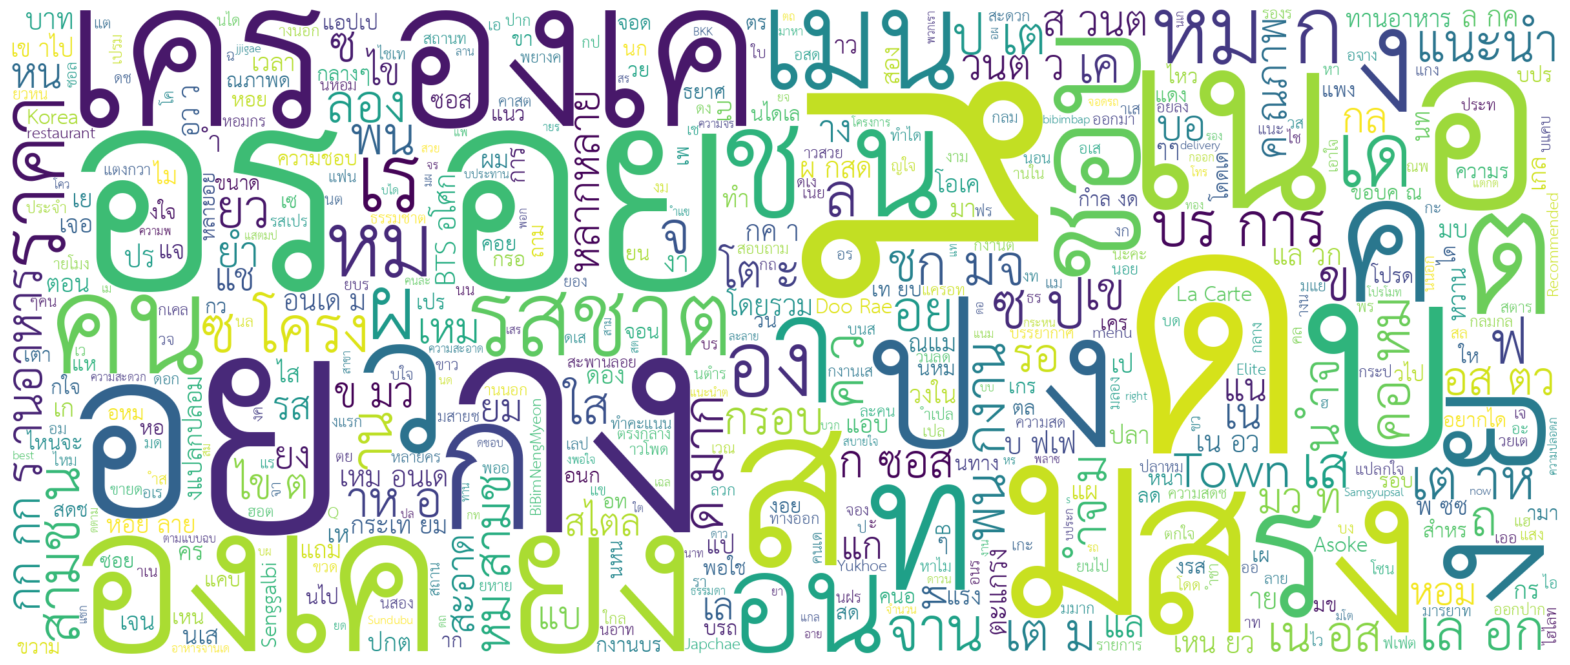

In [106]:
wordcloud = WordCloud(font_path='THSarabunNew.ttf',background_color="white", max_words=5000, contour_width=3, contour_color='steelblue', width=2400, height=1000)
wordcloud.generate(long_string)

# Display the word cloud using Matplotlib
plt.figure(figsize=(20, 15))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Hide axis
plt.show()